## Exponential and Logistic modelling to COVID-19 cases in Italy, Brazil, China and Spain 

### By Cibele Russo

Inspired in the codes from https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d 

Last modified in May 1st 2020

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))


In [0]:
url = "https://covid.ourworldindata.org/data/ecdc/total_cases.csv"
df = pd.read_csv(url)
df = df.loc[:,['date','Brazil']]
FMT = '%Y-%m-%d'
date = df['date']
df['data'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days  )
df=df.dropna()
df;

In [4]:
x = list(df.iloc[:,2])
y = list(df.iloc[:,1])

fit = curve_fit(logistic_model,x,y,p0=[2,10,2000])

a_logistic=fit[0][0]
b_logistic=fit[0][1]
c_logistic=fit[0][2]

sol = int(fsolve(lambda x : logistic_model(x,a_logistic,b_logistic,c_logistic) - int(c_logistic),b_logistic))
sol
print(a_logistic,b_logistic,c_logistic)

10.337360737595986 127.34835856602949 237785.2460996586


In [0]:
exp_fit = curve_fit(exponential_model,x,y,p0=[0.2,.5,.1])

a_exponential=exp_fit[0][0]
b_exponential=exp_fit[0][1]
c_exponential=exp_fit[0][2]

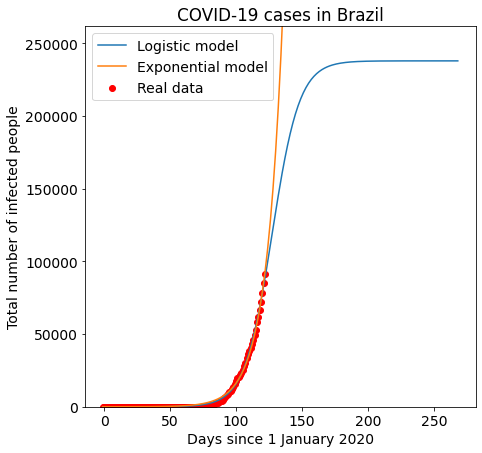

In [6]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]

plt.rc('font', size=14)# Real data
plt.scatter(x,y,label="Real data",color="red")# Predicted logistic curve

plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )# Predicted exponential curve
plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )
plt.legend()

plt.title("COVID-19 cases in Brazil")
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,c_logistic*1.1))
plt.show()



In [0]:
url = "https://covid.ourworldindata.org/data/ecdc/total_cases.csv"
df = pd.read_csv(url)
df = df.loc[:,['date','China']]
FMT = '%Y-%m-%d'
date = df['date']
df['data'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days  )
df=df.dropna()
df;

In [8]:
x = list(df.iloc[:,2])
y = list(df.iloc[:,1])

fit = curve_fit(logistic_model,x,y,p0=[2,10,200000])

a_logistic=fit[0][0]
b_logistic=fit[0][1]
c_logistic=fit[0][2]

sol = int(fsolve(lambda x : logistic_model(x,a_logistic,b_logistic,c_logistic) - int(c_logistic),b_logistic))
sol

99

In [9]:
# Exponential fit is not adequate for China

exp_fit = curve_fit(exponential_model,x,y,p0=[0.1,.1,.1])

a_exponential=exp_fit[0][0]
b_exponential=exp_fit[0][1]
c_exponential=exp_fit[0][2]

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


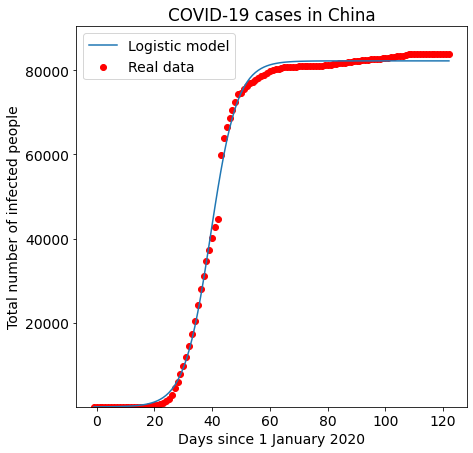

In [10]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]

plt.rc('font', size=14)# Real data
plt.scatter(x,y,label="Real data",color="red")# Predicted logistic curve

plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )# Predicted exponential curve
plt.legend()

plt.title("COVID-19 cases in China")
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,c_logistic*1.1))
plt.show()

In [11]:
url = "https://covid.ourworldindata.org/data/ecdc/total_cases.csv"
df = pd.read_csv(url)
df = df.loc[:,['date','Spain']]
FMT = '%Y-%m-%d'
date = df['date']
df['data'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days  )
df=df.dropna()
df.head()

,date,Spain,data
0,2019-12-31,0.0,-1
1,2020-01-01,0.0,0
2,2020-01-02,0.0,1
3,2020-01-03,0.0,2
4,2020-01-04,0.0,3


In [12]:
x = list(df.iloc[:,2])
y = list(df.iloc[:,1])

fit = curve_fit(logistic_model,x,y,p0=[2,10,2000])

a_logistic=fit[0][0]
b_logistic=fit[0][1]
c_logistic=fit[0][2]

sol = int(fsolve(lambda x : logistic_model(x,a_logistic,b_logistic,c_logistic) - int(c_logistic),b_logistic))
sol

175

In [0]:
exp_fit = curve_fit(exponential_model,x,y,p0=[0.2,.5,.1])

a_exponential=exp_fit[0][0]
b_exponential=exp_fit[0][1]
c_exponential=exp_fit[0][2]

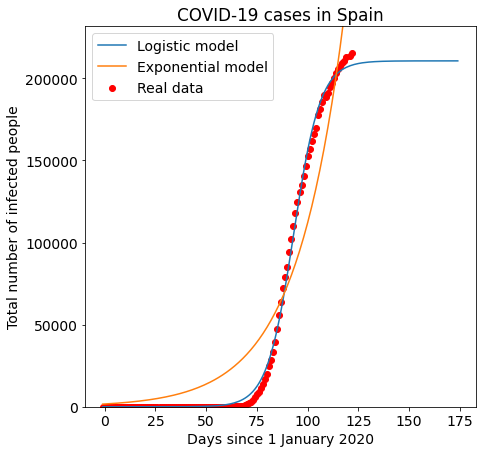

In [14]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]

plt.rc('font', size=14)# Real data
plt.scatter(x,y,label="Real data",color="red")# Predicted logistic curve

plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )# Predicted exponential curve
plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )
plt.legend()

plt.title("COVID-19 cases in Spain")
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,c_logistic*1.1))
plt.show()

In [0]:
url = "https://covid.ourworldindata.org/data/ecdc/total_cases.csv"
df = pd.read_csv(url)
df = df.loc[:,['date','United States']]
FMT = '%Y-%m-%d'
date = df['date']
df['data'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days  )
df=df.dropna()
df;

In [16]:
x = list(df.iloc[:,2])
y = list(df.iloc[:,1])

fit = curve_fit(logistic_model,x,y,p0=[2,10,2000])

a_logistic=fit[0][0]
b_logistic=fit[0][1]
c_logistic=fit[0][2]

sol = int(fsolve(lambda x : logistic_model(x,a_logistic,b_logistic,c_logistic) - int(c_logistic),b_logistic))
sol

215

In [17]:
exp_fit = curve_fit(exponential_model,x,y,p0=[0.2,.5,.1])

a_exponential=exp_fit[0][0]
b_exponential=exp_fit[0][1]
c_exponential=exp_fit[0][2]

RuntimeError: ignored

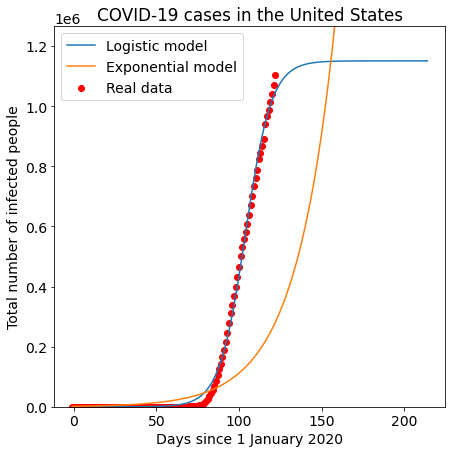

[7.87704664e+00 1.03898874e+02 1.15069184e+06]


In [18]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]

plt.rc('font', size=14)# Real data
plt.scatter(x,y,label="Real data",color="red")# Predicted logistic curve

plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )# Predicted exponential curve
plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )
plt.legend()

plt.title("COVID-19 cases in the United States")
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,c_logistic*1.1))
plt.show()

print(fit[0])

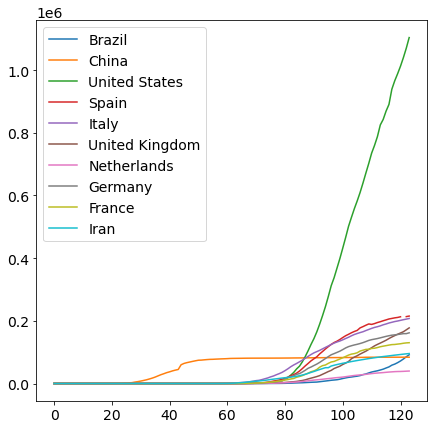

In [19]:
url = "https://covid.ourworldindata.org/data/ecdc/total_cases.csv"
df = pd.read_csv(url)
df=df.loc[:,['Brazil','China','United States','Spain','Italy','United Kingdom','Netherlands','Germany','France','Iran']]

df.head()
df.plot()

In [0]:
#primeira observação do corona virus
list(np.cumsum(df.iloc[:,0]>0)==1).index(True)

#contagem total dos dados
len(df.iloc[:,0])

Brazil = df.loc[(list(np.cumsum(df.iloc[:,0]>0)==1).index(True)):(len(df.iloc[:,0])), 'Brazil']
China = df.loc[(list(np.cumsum(df.iloc[:,1]>0)==1).index(True)):(len(df.iloc[:,1])), 'China']
USA = df.loc[(list(np.cumsum(df.loc[:,"United States"]>0)==1).index(True)):(len(df.loc[:,"United States"])), 'United States']
Netherlands = df.loc[(list(np.cumsum(df.loc[:,"Netherlands"]>0)==1).index(True)):(len(df.loc[:,"Netherlands"])), 'Netherlands']
Spain = df.loc[(list(np.cumsum(df.loc[:,"Spain"]>0)==1).index(True)):(len(df.loc[:,"Spain"])), 'Spain']
Italy = df.loc[(list(np.cumsum(df.loc[:,"Italy"]>0)==1).index(True)):(len(df.loc[:,"Italy"])), 'Italy']

Brazil.index = range(0,len(Brazil),1)
China.index = range(0,len(China),1)
USA.index= range(0, len(USA),1)
Netherlands.index=range(0,len(Netherlands),1)
Spain.index=range(0,len(Spain),1)
Italy.index=range(0,len(Italy),1)

Brazil = Brazil.fillna(method="ffill")
China = China.fillna(method="ffill")
USA = USA.fillna(method="ffill")
Netherlands = Netherlands.fillna(method="ffill")
Spain = Spain.fillna(method="ffill")
Italy = Italy.fillna(method="ffill")


In [0]:
#primeira observação do corona virus
list(np.cumsum(df.iloc[:,0]>0)==1).index(True)

#contagem total dos dados
len(df.iloc[:,0])

Brazil_log = np.log(Brazil)
China_log = np.log(China)
USA_log = np.log(USA)
Netherlands_log = np.log(Netherlands)
Spain_log = np.log(Spain)
Italy_log = np.log(Italy)


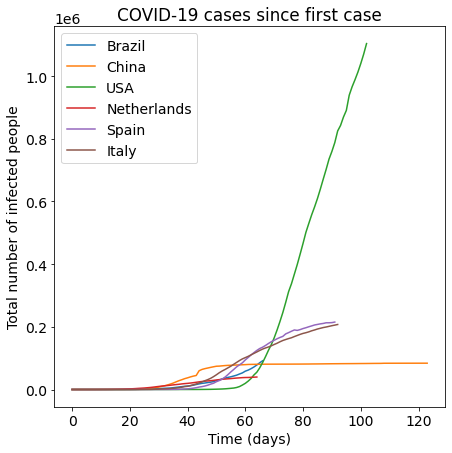

In [22]:
plt.plot(Brazil)
plt.plot(China)
plt.plot(USA)
plt.plot(Netherlands)
plt.plot(Spain)
plt.plot(Italy)

plt.legend(["Brazil","China","USA","Netherlands","Spain","Italy"])

plt.title("COVID-19 cases since first case")
plt.xlabel("Time (days)")
plt.ylabel("Total number of infected people")

plt.show()

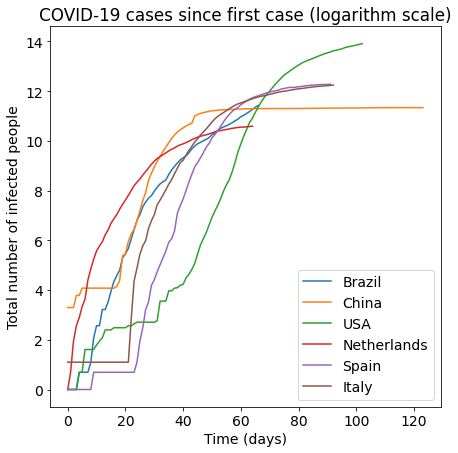

In [23]:
plt.plot(Brazil_log)
plt.plot(China_log)
plt.plot(USA_log)
plt.plot(Netherlands_log)
plt.plot(Spain_log)
plt.plot(Italy_log)

plt.legend(["Brazil","China","USA","Netherlands","Spain","Italy"])

plt.title("COVID-19 cases since first case (logarithm scale)")
plt.xlabel("Time (days)")
plt.ylabel("Total number of infected people")

plt.show()

In [0]:
#primeira observação do corona virus
list(np.cumsum(df.iloc[:,0]>0)==1).index(True)

#contagem total dos dados
len(df.iloc[:,0])

Brazil = df.loc[(list(np.cumsum(df.iloc[:,0]>0)==1).index(True)):(len(df.iloc[:,0])), 'Brazil']
China = df.loc[(list(np.cumsum(df.iloc[:,1]>0)==1).index(True)):(len(df.iloc[:,1])), 'China']
USA = df.loc[(list(np.cumsum(df.loc[:,"United States"]>0)==1).index(True)):(len(df.loc[:,"United States"])), 'United States']
Netherlands = df.loc[(list(np.cumsum(df.loc[:,"Netherlands"]>0)==1).index(True)):(len(df.loc[:,"Netherlands"])), 'Netherlands']
Spain = df.loc[(list(np.cumsum(df.loc[:,"Spain"]>0)==1).index(True)):(len(df.loc[:,"Spain"])), 'Spain']
Italy = df.loc[(list(np.cumsum(df.loc[:,"Italy"]>0)==1).index(True)):(len(df.loc[:,"Italy"])), 'Italy']

Brazil.index = range(0,len(Brazil),1)
China.index = range(0,len(China),1)
USA.index= range(0, len(USA),1)
Netherlands.index=range(0,len(Netherlands),1)
Spain.index=range(0,len(Spain),1)
Italy.index=range(0,len(Italy),1)

Brazil = Brazil.fillna(method="ffill")
China = China.fillna(method="ffill")
USA = USA.fillna(method="ffill")
Netherlands = Netherlands.fillna(method="ffill")
Spain = Spain.fillna(method="ffill")
Italy = Italy.fillna(method="ffill")